In [1]:
import sys
import os
import numpy as np
import multiprocessing
import dill
import matplotlib.pyplot as plt
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/../src/simulations_v2")
    sys.path.append(module_path + "/..")
from load_params import load_params

from multi_group_simulation import MultiGroupSimulation

In [2]:
from util_functions import *
from uncertainty_analysis import *
from sim_helper_functions import *

In [13]:
prior_sim_files = []
for i in range(200):
    fname = '/home/aaj54/group-testing/notebooks/pnas_paper_figs/prior_sims/timestamp_1620240331/prior_{}.dill'.format(i)
    prior_sim_files.append(fname)

prior_data = load_sim_output(prior_sim_files)
prior_data

,asymp_prob_mult,inital_prev_mult,R0,outside_inf_mult,daily_self_report_prob,ct_mult,ct_testing_ratio,test_sensitivity,test_noncompliance,E_time,...,res_cornell_inf_90,res_ithaca_inf_10,res_ithaca_inf_50,res_ithaca_inf_90,vir_cornell_inf_10,vir_cornell_inf_50,vir_cornell_inf_90,vir_ithaca_inf_10,vir_ithaca_inf_50,vir_ithaca_inf_90
0,1.105403,1.027147,3.639263,1.164544,0.223732,1.788490,1.141808,0.610485,0.128067,1.588502,...,477.7,262.9,303.5,348.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.034458,0.934665,1.426772,1.018528,0.466081,1.836050,0.816283,0.653479,0.137818,2.154963,...,125.4,136.0,150.0,163.2,NaN,NaN,NaN,NaN,NaN,NaN
2,1.119300,1.061253,3.057253,1.092259,0.321024,0.787352,0.733479,0.724924,0.123132,2.026480,...,664.7,246.0,299.0,363.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0.831878,0.966304,1.747983,1.105153,0.410393,1.748110,0.911399,0.587266,0.118356,1.344632,...,159.4,152.9,168.5,182.3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.798042,0.553348,2.608265,1.202193,0.354607,1.787774,1.255935,0.779187,0.110719,2.444074,...,150.3,150.9,163.5,184.1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.978172,1.224422,1.051221,1.355805,0.222087,1.839923,1.003761,0.715986,0.086677,3.026787,...,141.2,179.8,196.0,212.4,NaN,NaN,NaN,NaN,NaN,NaN
196,0.573802,1.201498,2.347837,1.276204,0.435707,1.653757,1.027820,0.545983,0.070850,2.188369,...,204.4,182.8,207.5,222.2,NaN,NaN,NaN,NaN,NaN,NaN
197,0.804410,1.459066,2.057836,0.685738,0.417540,1.317804,1.228906,0.451050,0.093532,2.018916,...,199.8,152.9,168.5,187.4,NaN,NaN,NaN,NaN,NaN,NaN
198,0.927828,0.737379,2.588087,0.706247,0.478736,1.502405,1.085930,0.615764,0.126489,1.683080,...,160.3,114.9,135.0,151.2,NaN,NaN,NaN,NaN,NaN,NaN


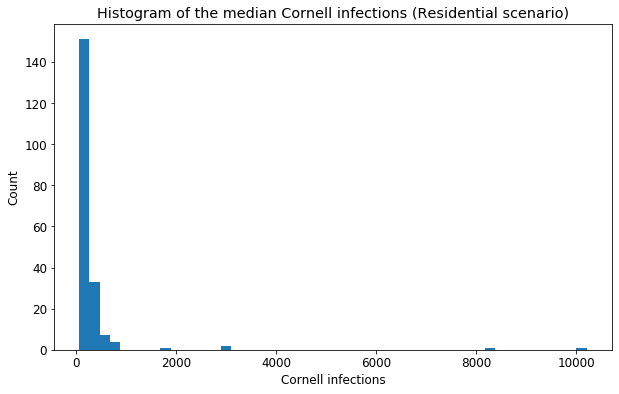

In [14]:
plt.figure(figsize=(10,6))
plt.hist(prior_data['res_cornell_inf_50'], bins=50)

plt.title('Histogram of the median Cornell infections (Residential scenario)')
plt.xlabel('Cornell infections')
plt.ylabel('Count')
plt.show()

/home/aaj54/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6743: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/aaj54/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6744: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

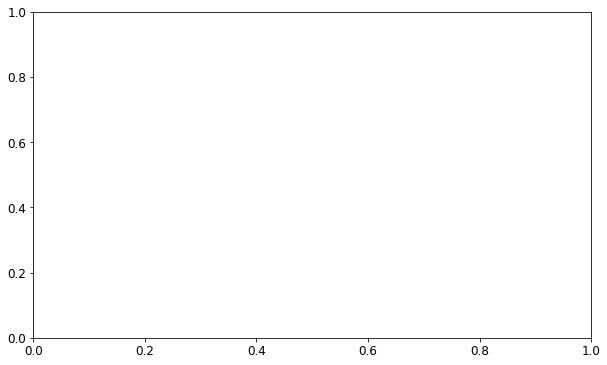

In [11]:
plt.figure(figsize=(10,6))
plt.hist(np.array(prior_data['vir_cornell_inf_50']) - np.array(prior_data['res_cornell_inf_50']), bins=50)

plt.title('Histogram of the median of Virtual - Residential Cornell infections')
plt.xlabel('Virtual - Residential Cornell infections')
plt.ylabel('Count')
plt.show()